In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import sys
from random import sample
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/home/gsmodi/Music/OneDrive_1_29-02-2020/Datasets/Question-3/airfoil.csv",header=None)

In [22]:
X=df.drop(labels=[5],axis=1)

Y=df[5]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [23]:
X.head()

,0,1,2,3,4
0,8000.0,4.0,0.2286,39.6,0.004738
1,6300.0,0.0,0.0508,55.5,0.000762
2,400.0,4.0,0.2286,55.5,0.004286
3,1250.0,15.4,0.0508,39.6,0.028259
4,800.0,7.3,0.2286,39.6,0.012348


In [24]:
X_train = (X_train - X_train.mean())/X_train.std()
# Y_train = (Y_train - Y_train.mean())/Y_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [25]:
X_train = pd.concat([X_train,Y_train],axis=1)
ones = np.ones([X_train.shape[0],1])
Y_train = X_train.iloc[:,5:6].values
X_train = X_train.iloc[:,0:5]
X_train = np.concatenate((ones,X_train),axis=1)

In [26]:
def gradient_decent(X_train,Y_train,theta,learning_rate,iterations):
    
    for i in range(iterations):
        theta = theta - (learning_rate/len(X_train)) * np.sum(X_train * (X_train @ theta.T - Y_train), axis=0)
    
    return theta

In [27]:
def calculate_pred(learning_rate,iterations,theta):
    g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
    g = g[0]
    y_pred = []
    for index,rows in X_test.iterrows():
        y = 0
        rows = list(rows)
        for i in range(len(rows)):
            y = y + rows[i]*g[i+1]
        y = y + g[0]
        y_pred.append(y)
    return y_pred

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

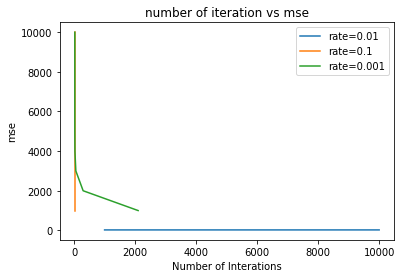

In [29]:
x_axis = [1000*i for i in range(1,11)]
er0=[]
er1=[]
er2=[]
learning_rate = [0.01,0.1,0.001]
iterations = 1000
theta = np.zeros([1,6])
for i in x_axis:
    pe=calculate_pred(learning_rate[0],i,theta)
    er0.append(mean_squared_error(Y_test.values.tolist(),pe))
for i in x_axis:
    pe=calculate_pred(learning_rate[1],i,theta)
    er1.append(mean_squared_error(Y_test.values.tolist(),pe))
for i in x_axis:
    pe=calculate_pred(learning_rate[2],i,theta)
    er2.append(mean_squared_error(Y_test.values.tolist(),pe))
fig,ax = plt.subplots()

ax.plot(x_axis,er0,label='rate=0.01')
ax.plot(er1,x_axis,label='rate=0.1')
ax.plot(er2,x_axis,label='rate=0.001') 
ax.legend()
ax.set_xlabel("Number of Interations")
ax.set_ylabel("mse")
ax.set_title("number of iteration vs mse")
plt.show()

In [30]:

learning_rate = 0.01
iterations = 1000
# theta = np.zeros(8) # 7 is the number of features
theta = np.zeros([1,6])
y_pred=calculate_pred(learning_rate,iterations,theta)
print(r2_score(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_percentage_error(Y_test.values.tolist(),y_pred))

0.5377272852274413
23.32993995876293
2.9729163214675958


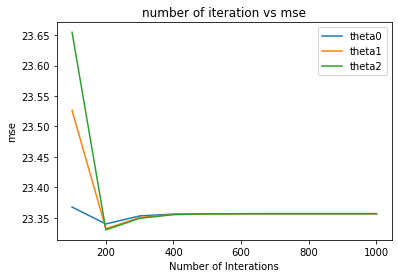

In [31]:
import random 

weights = []
for i in range(3):
    weights1=random.sample(range(1, 10), len(X_train[0]))
    weights.append(weights1)

theta0=np.array([weights[0]])
theta1=np.array([weights[1]])
theta2=np.array([weights[2]])

x_axis = [100*i for i in range(1,11)]
er0=[]
er1=[]
er2=[]
learning_rate =0.1
iterations = 1000

for i in x_axis:
    pe=calculate_pred(learning_rate,i,theta0)
    er0.append(mean_squared_error(Y_test,pe))
for i in x_axis:
    pe=calculate_pred(learning_rate,i,theta1)
    er1.append(mean_squared_error(Y_test,pe))
for i in x_axis:
    pe=calculate_pred(learning_rate,i,theta2)
    er2.append(mean_squared_error(Y_test,pe))
fig,ax = plt.subplots()
ax.plot(x_axis,er0,label='theta0')
ax.plot(x_axis,er1,label='theta1')
ax.plot(x_axis,er2,label='theta2') 
ax.legend()
ax.set_xlabel("Number of Interations")
ax.set_ylabel("mse")
ax.set_title("number of iteration vs mse")
plt.show()



If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. (No need of Code Experimentation)

**(a) When 0-0.5% of values are missing of that feature.**

We can fill all missing values with appropriate way. Since 99.5% data is avilable we can use it to predict the best possible value of that missing cell. 

Guessing: Guess the missing value from 99.5% data which is avialble.

Average: Fill the missing value with average

**2) When 8-10% of values are missing of that feature:**

(a)Average:Take average if its a numerical data or else take mode if it is a categoriacal data

(b)Regression Substitution: You can use multiple-regression analysis to estimate a missing value.Regression substitution predicts the missing value from the other values

(c)Deletion:That row can be dropped

**3) When 60-70% of values are missing of that feature**

(a)Deletion: That whole column can be dropped
